# Ejercicio 3.1: 

Supongamos que tenemos un dataset mezcla de 2 grupos aleatorios bidimensionales. Encontrar un clasificador por K-NN y, evaluar exactitud, precisión y f-measure. 

Inicializamos las bibliotecas:

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Creamos el dataset con 2 grupos aleatorios bidimensionales (en este caso con 2 features/variables).

In [2]:
n=100
var=2
med=10

a=np.random.normal(loc=med, size=(n,var))
a_rd=np.round(a)
df_a=pd.DataFrame((a_rd),columns=['x','y'])
df_a['clase']=0

med2=12

b=np.random.normal(loc=med2, size=(n,var))
b_rd=np.round(b)
df_b=pd.DataFrame((b_rd),columns=['x','y'])
df_b['clase']=1

dataf=pd.concat([df_a,df_b])
dataf

,x,y,clase
0,11.0,11.0,0
1,10.0,11.0,0
2,10.0,12.0,0
3,11.0,12.0,0
4,10.0,11.0,0
...,...,...,...
95,12.0,11.0,1
96,11.0,11.0,1
97,12.0,12.0,1
98,10.0,14.0,1


Importamos las funciones de la biblioteca de scikit learn para crear un clasificador K-NN.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import metrics

Generamos nuestros sets de entrenamiento y testeo para usar luego en la clasificación.

In [4]:
dat = dataf.drop(columns='clase')
print(dat.shape)
clase = dataf['clase']

train_dat, test_dat, train_clase, test_clase=train_test_split(dat, clase, test_size=0.5)
print(train_dat.shape)
print(train_clase.shape)

(200, 2)
(100, 2)
(100,)


Aplicamos un método de clasificación K-NN a nuestro conjunto de entrenamiento con un valor de k=10.

In [5]:
knn1 = neighbors.KNeighborsClassifier(n_neighbors=10)
knn1.fit(train_dat, train_clase)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

Evaluamos nuestro modelo con el conjunto de testeo.

In [6]:
pred = knn1.predict(test_dat)
acc = metrics.accuracy_score(test_clase,pred)
prec = metrics.precision_score(test_clase,pred)
f_mes =metrics.f1_score(test_clase,pred)

print('La exactitud del modelo fue:',acc)
print('La precisión del modelo fue:',prec)
print('El valor de f-measure fue:',f_mes)

La exactitud del modelo fue: 0.83
La precisión del modelo fue: 1.0
El valor de f-measure fue: 0.8247422680412371


Visualizamos los resultados del clasificador graficando la matriz de confusión.

[[43  0]
 [17 40]]


Text(0.5, 257.44, 'Clase Predicha')

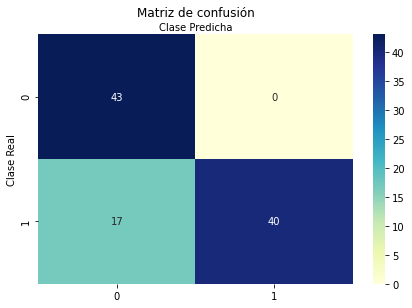

In [7]:
from sklearn.metrics import confusion_matrix

clases=[0,1]    
cf_mtx = metrics.confusion_matrix(test_clase,pred,labels=clases)   #calculo de la matriz
print(cf_mtx)

fig,ax = plt.subplots()     #Graficamos la matriz de confusión
referencias = np.arange(len(clases))
plt.xticks(referencias, clases)
plt.yticks(referencias, clases)

sns.heatmap(pd.DataFrame(cf_mtx), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')

Volvemos a correr el modelo pero ahora con un valor de k=20 y volvemos a evaluar la performance.

In [8]:
knn2 = neighbors.KNeighborsClassifier(n_neighbors=20)
knn2.fit(train_dat, train_clase)

pred2 = knn2.predict(test_dat)
acc2 = metrics.accuracy_score(test_clase,pred2)
prec2 = metrics.precision_score(test_clase,pred2)
f_mes2 =metrics.f1_score(test_clase,pred2)

print('La exactitud del modelo fue:',acc2)
print('La precisión del modelo fue:',prec2)
print('El valor de f-measure fue:',f_mes2)

La exactitud del modelo fue: 0.9
La precisión del modelo fue: 1.0
El valor de f-measure fue: 0.9038461538461539


Visualizamos los resultados del nuevo modelo.

[[43  0]
 [10 47]]


Text(0.5, 257.44, 'Clase Predicha')

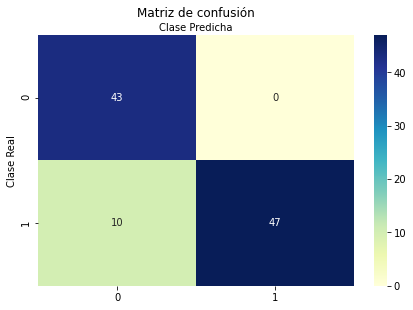

In [9]:
cf_mtx = metrics.confusion_matrix(test_clase,pred2)   #calculo de la matriz
print(cf_mtx)

clases=[0,1]    #Graficamos la matriz de confusión
fig,ax = plt.subplots(1)
referencias = np.arange(len(clases))
plt.xticks(referencias, clases)
plt.yticks(referencias, clases)

sns.heatmap(pd.DataFrame(cf_mtx), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout(1)
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')

# Ejercicio 3.3:

Usando el dataset alojado en github desarrollar un clasificador que prediga si una canción dada va a ser gustada o no. Aclarar y justificar los pasos, analizar y explicar los resultados.

Inicializamos las bibliotecas:

In [10]:
import pandas as pd
import numpy as np

Abrimos el dataset de spotify con la biblioteca pandas.

In [11]:
spotify = pd.read_csv('https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv', header=0, sep=",")
spot = pd.read_csv('https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv', header=0, sep=",")
print(spot.shape)
print(spot.describe())
print(spot.columns)
print(spot.target)    #si la canción "gusta"=1 y si "no gusta"=0

(2017, 17)
        Unnamed: 0  acousticness  ...      valence       target
count  2017.000000   2017.000000  ...  2017.000000  2017.000000
mean   1008.000000      0.187590  ...     0.496815     0.505702
std     582.402066      0.259989  ...     0.247195     0.500091
min       0.000000      0.000003  ...     0.034800     0.000000
25%     504.000000      0.009630  ...     0.295000     0.000000
50%    1008.000000      0.063300  ...     0.492000     1.000000
75%    1512.000000      0.265000  ...     0.691000     1.000000
max    2016.000000      0.995000  ...     0.992000     1.000000

[8 rows x 15 columns]
Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')
0       1
1       1
2       1
3       1
4       1
       ..
2012    0
2013    0
2014    0
2015    0
2016    0
Name: target

De mi análisis inicial excluyo los features "song_title" y "artist" por la baja probabilidad de influir en el resultado final (inferencia personal), además estos feature tienen una gran variabilidad chequeandolos al visteo. También se descartó "unnamed: 0" que se usa como índice.

In [12]:
del spotify['artist']
del spotify['song_title']
print(spotify.shape)
print(spotify.columns)

del spot['artist']
del spot['song_title']

print(spot.shape)
print(spot.columns)

(2017, 15)
Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target'],
      dtype='object')
(2017, 15)
Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target'],
      dtype='object')


Analizamos el resto de los features vs "target" por separado para tomar la decisión de mantenerlos o excluirlos del dataset final que ingresa al modelo de clasificación. Para eso vamos a necesitar la función pyplot de la biblioteca de matplotlib.

In [13]:
from matplotlib import pyplot as plt

Hacemos un gráfico de dispersión para analizar visualmente la distribución de los datos de cada feature frente a la variable discreta "target".

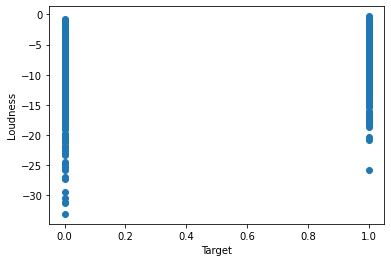

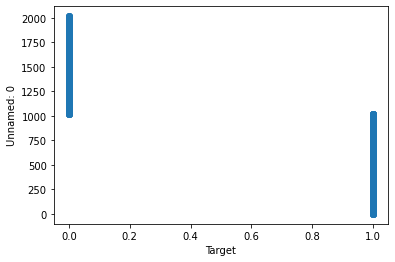

In [14]:
plt.figure(1)
plt.scatter(spot.target,spot.loudness)
plt.xlabel('Target')
plt.ylabel('Loudness')
plt.show(1)

plt.figure(2)
plt.scatter(spot.target,spot['Unnamed: 0'])
plt.xlabel('Target')
plt.ylabel('Unnamed: 0')
plt.show(2)

Haciendo un análisis rápido dejamos en el dataset de prueba unicamente las características que muestran una relación con el feature "target".

In [15]:
del spot['acousticness']
del spot['danceability']
del spot['energy']
del spot['instrumentalness']
del spot['key']
del spot['liveness']
del spot['speechiness']
del spot['valence']
del spot['tempo']
del spot['time_signature']
del spot['duration_ms']
del spot['mode']
print(spot.shape)
print(spot.columns)

(2017, 3)
Index(['Unnamed: 0', 'loudness', 'target'], dtype='object')


Importamos las funciones de la biblioteca de scikit learn para hacer nuestro muestreo de entrenamiento y testeo, y la función para hacer la clasificación con K-NN.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import metrics

Separamos de nuestro dataset depurado y el cuasi-completo un conjunto de datos para entrenamiento y otro para testeo.

In [17]:
spot1 = spot.drop(columns='target')
print(spot1.shape)
targ1 = spot['target']
print(targ1)

train_spot, test_spot, train_target, test_target = train_test_split(spot1, targ1, test_size=0.5)
print(train_spot.shape)
print(train_target.shape)

spot2 = spotify.drop(columns='target')
targ2 = spotify['target']

train_spotify, test_spotify, train_targets, test_targets = train_test_split(spot2, targ2, test_size=0.5)
print(train_spotify.shape)
print(train_targets.shape)

(2017, 2)
0       1
1       1
2       1
3       1
4       1
       ..
2012    0
2013    0
2014    0
2015    0
2016    0
Name: target, Length: 2017, dtype: int64
(1008, 2)
(1008,)
(1008, 14)
(1008,)


Generamos un modelo de clasificación con el método K-NN donde k=45 (equivalente a la raíz de n) y evaluamos distintos parámetros de performance sobre ambos datasets (depurado e inicial).

In [18]:
k=45

knn3 = neighbors.KNeighborsClassifier(n_neighbors=k)
knn3.fit(train_spot, train_target)

pred3 = knn3.predict(test_spot)
acc3 = metrics.accuracy_score(test_target,pred3)
prec3 = metrics.precision_score(test_target,pred3)
f_mes3 =metrics.f1_score(test_target,pred3)

print('La performance del clasificador usando el dataset depurado es:')
print('La exactitud del modelo fue:',acc3)
print('La precisión del modelo fue:',prec3)
print('El valor de f-measure fue:',f_mes3)

knn4 = neighbors.KNeighborsClassifier(n_neighbors=k)
knn4.fit(train_spotify, train_targets)

pred4 = knn4.predict(test_spotify)
acc4 = metrics.accuracy_score(test_targets,pred4)
prec4 = metrics.precision_score(test_targets,pred4)
f_mes4 =metrics.f1_score(test_targets,pred4)

print('\n')
print('La performance del clasificador usando el dataset sin depurar es:')
print('La exactitud del modelo fue:',acc4)
print('La precisión del modelo fue:',prec4)
print('El valor de f-measure fue:',f_mes4)

La performance del clasificador usando el dataset depurado es:
La exactitud del modelo fue: 0.998017839444995
La precisión del modelo fue: 1.0
El valor de f-measure fue: 0.9980806142034548


La performance del clasificador usando el dataset sin depurar es:
La exactitud del modelo fue: 0.6184340931615461
La precisión del modelo fue: 0.6307053941908713
El valor de f-measure fue: 0.6122860020140987


Visualizamos los resultados del modelo generado con el dataset depurado y el modelo del dataset sin depurar.

[[487   0]
 [  2 520]]
[[320 178]
 [207 304]]


Text(0.5, 257.44, 'Target Predicho')

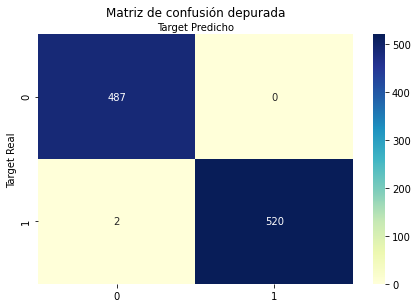

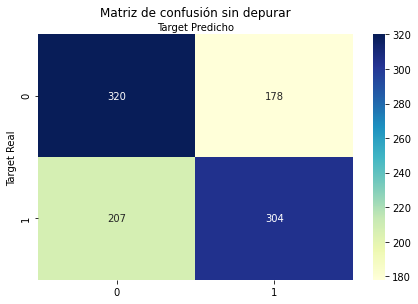

In [19]:
cf_mtx3 = metrics.confusion_matrix(test_target,pred3)   #calculo de la matriz
print(cf_mtx3)

tar3=['Positivo','Negativo']    #Graficamos la matriz de confusión
fig,ax = plt.subplots()
referencias = np.arange(len(tar3))
plt.xticks(referencias, tar3)
plt.yticks(referencias, tar3)

sns.heatmap(pd.DataFrame(cf_mtx3), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión depurada', y=1.1)
plt.ylabel('Target Real')
plt.xlabel('Target Predicho')

cf_mtx4 = metrics.confusion_matrix(test_targets,pred4)   #calculo de la matriz
print(cf_mtx4)

tar4=[0,1]    #Graficamos la matriz de confusión
fig,ax = plt.subplots()
referencias = np.arange(len(tar4))
plt.xticks(referencias, tar4)
plt.yticks(referencias, tar4)

sns.heatmap(pd.DataFrame(cf_mtx4), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión sin depurar', y=1.1)
plt.ylabel('Target Real')
plt.xlabel('Target Predicho')